In [1]:
import pandas as pd
import numpy as np
import gdown
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import string
import collections
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow.keras import ops, backend
from tensorflow.keras.layers import Layer, EinsumDense, Softmax, Dropout
import keras
sns.set()

2025-10-16 10:13:17.826944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760609598.038609      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760609598.091811      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
FILE_ID = "1hpsqSpfjdqIZWqwd259klQSeaNSe5Trr"
OUTPUT_CSV = "bitcoin3.csv"

gdown.download(f"https://drive.google.com/uc?id={FILE_ID}", output=OUTPUT_CSV, quiet=True)

# Baca file dengan pandas
df = pd.read_csv(OUTPUT_CSV)
df

,Date,Close,Volume USDT,RSI,MACD_Hist,ATR,KAMAO
0,2017-09-21 09:00:00.000,3860.00,7.443489e+04,49.192454,-48.279697,88.054720,2.495591
1,2017-09-21 10:00:00.000,3871.48,4.468732e+04,49.233202,-47.780476,87.996283,2.616710
2,2017-09-21 11:00:00.000,3864.95,8.054617e+04,49.210685,-47.308061,87.897128,2.532239
3,2017-09-21 12:00:00.000,3858.08,9.033153e+04,49.186948,-46.863233,87.720856,2.447245
4,2017-09-21 13:00:00.000,3856.67,1.034058e+05,49.182064,-46.425379,87.578086,2.424654
...,...,...,...,...,...,...,...
53145,2023-10-19 19:00:00,28750.75,2.984059e+07,53.630054,109.926882,129.065981,7.459700
53146,2023-10-19 20:00:00,28715.38,4.997623e+07,53.531282,111.721905,129.268969,7.118597
53147,2023-10-19 21:00:00,28604.09,3.205666e+07,53.221944,113.055031,129.287930,6.210037
53148,2023-10-19 22:00:00,28649.65,2.200420e+07,53.332673,114.513131,129.219782,6.515616


In [3]:
df["Date"] = pd.to_datetime(df["Date"], format="mixed")
df

,Date,Close,Volume USDT,RSI,MACD_Hist,ATR,KAMAO
0,2017-09-21 09:00:00,3860.00,7.443489e+04,49.192454,-48.279697,88.054720,2.495591
1,2017-09-21 10:00:00,3871.48,4.468732e+04,49.233202,-47.780476,87.996283,2.616710
2,2017-09-21 11:00:00,3864.95,8.054617e+04,49.210685,-47.308061,87.897128,2.532239
3,2017-09-21 12:00:00,3858.08,9.033153e+04,49.186948,-46.863233,87.720856,2.447245
4,2017-09-21 13:00:00,3856.67,1.034058e+05,49.182064,-46.425379,87.578086,2.424654
...,...,...,...,...,...,...,...
53145,2023-10-19 19:00:00,28750.75,2.984059e+07,53.630054,109.926882,129.065981,7.459700
53146,2023-10-19 20:00:00,28715.38,4.997623e+07,53.531282,111.721905,129.268969,7.118597
53147,2023-10-19 21:00:00,28604.09,3.205666e+07,53.221944,113.055031,129.287930,6.210037
53148,2023-10-19 22:00:00,28649.65,2.200420e+07,53.332673,114.513131,129.219782,6.515616


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53150 entries, 0 to 53149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         53150 non-null  datetime64[ns]
 1   Close        53150 non-null  float64       
 2   Volume USDT  53150 non-null  float64       
 3   RSI          53150 non-null  float64       
 4   MACD_Hist    53150 non-null  float64       
 5   ATR          53150 non-null  float64       
 6   KAMAO        53150 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 MB


In [5]:
df.describe()

,Date,Close,Volume USDT,RSI,MACD_Hist,ATR,KAMAO
count,53150,53150.000000,5.315000e+04,53150.000000,53150.000000,53150.000000,53150.000000
mean,2020-10-06 08:45:08.178286080,20595.357333,6.919215e+07,50.403605,0.528272,221.733334,0.229762
min,2017-09-21 09:00:00,3172.050000,0.000000e+00,35.178834,-1885.690630,17.436266,-31.767152
25%,2019-03-31 19:15:00,7976.915000,1.012558e+07,48.294197,-115.601600,72.702488,-2.717470
50%,2020-10-06 20:30:00,13878.095000,2.766119e+07,50.038483,10.154419,128.787616,-0.032747
75%,2022-04-14 05:45:00,29646.720000,8.944278e+07,52.406274,122.367509,325.616826,3.162442
max,2023-10-19 23:00:00,68633.690000,3.005634e+09,64.657108,1430.405758,1004.531407,39.740297
std,NaN,15822.296994,1.059041e+08,3.210682,353.293188,208.401440,5.168655


In [ ]:
# Exploratory Data Analysis Menggunakan method .corr()
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm").set_title("Korelasi Tiap Fitur");

In [ ]:
df = df.sort_values("Date").set_index("Date")
df

### Mempersiapkan Data dan Membangun Model Baseline

In [ ]:
SHORT_WINDOW = 7
LONG_WINDOW = 30

# Feature Engineering
df["rolling_mean"] = df["Close"].rolling(window=SHORT_WINDOW).mean()
df["rolling_std"] = df["Close"].rolling(window=SHORT_WINDOW).std()
df.fillna(0, inplace=True)
df

In [ ]:
feature_to_use = ["Close", "rolling_mean", "rolling_std"]
df = df[feature_to_use]

In [ ]:
# Splitting data train 80%, data val 10%, data test 10%
n_data = len(df)

train_split = int(n_data * 0.8)
val_split = int(n_data * 0.9)

train_data = df.iloc[:train_split]
val_data = df.iloc[train_split:val_split]
test_data = df.iloc[val_split:]

print(f"train_data : {train_data.shape}")
print(f"val_data : {val_data.shape}")
print(f"test_data : {test_data.shape}")

In [ ]:
# Normalisasi
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

In [ ]:
def make_multivariate_window(window, horizon):
    encoder_input = window[:-horizon]
    decoder_target = window[-horizon:, 0:1]
    start_token = encoder_input[-1:, 0:1]
    decoder_input = tf.concat([start_token, decoder_target[:-1]], axis=0)

    return (encoder_input, decoder_input), decoder_target

In [ ]:
def create_multivariate_dataset(series, window_size, horizon, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + horizon, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + horizon))
    ds = ds.map(lambda w: make_multivariate_window(w, horizon))

    return ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [14]:
# Tentukan parameter model
WINDOW_SIZE = 300
HORIZON = 24
BATCH_SIZE = 32

# Buat pipeline data
train_ds_multi = create_multivariate_dataset(train_scaled, WINDOW_SIZE, HORIZON, BATCH_SIZE)
val_ds_multi = create_multivariate_dataset(val_scaled, WINDOW_SIZE, HORIZON, BATCH_SIZE)
test_ds_multi = create_multivariate_dataset(test_scaled, WINDOW_SIZE, HORIZON, BATCH_SIZE)
train_ds_multi

I0000 00:00:1760609615.194737      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


<_PrefetchDataset element_spec=((TensorSpec(shape=(None, None, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None)), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

In [15]:
df

,Close,rolling_mean,rolling_std
Date,,,
2017-09-21 09:00:00,3860.00,0.000000,0.000000
2017-09-21 10:00:00,3871.48,0.000000,0.000000
2017-09-21 11:00:00,3864.95,0.000000,0.000000
2017-09-21 12:00:00,3858.08,0.000000,0.000000
2017-09-21 13:00:00,3856.67,0.000000,0.000000
...,...,...,...
2023-10-19 19:00:00,28750.75,28629.658571,90.137546
2023-10-19 20:00:00,28715.38,28662.985714,66.514979
2023-10-19 21:00:00,28604.09,28652.077143,69.373602


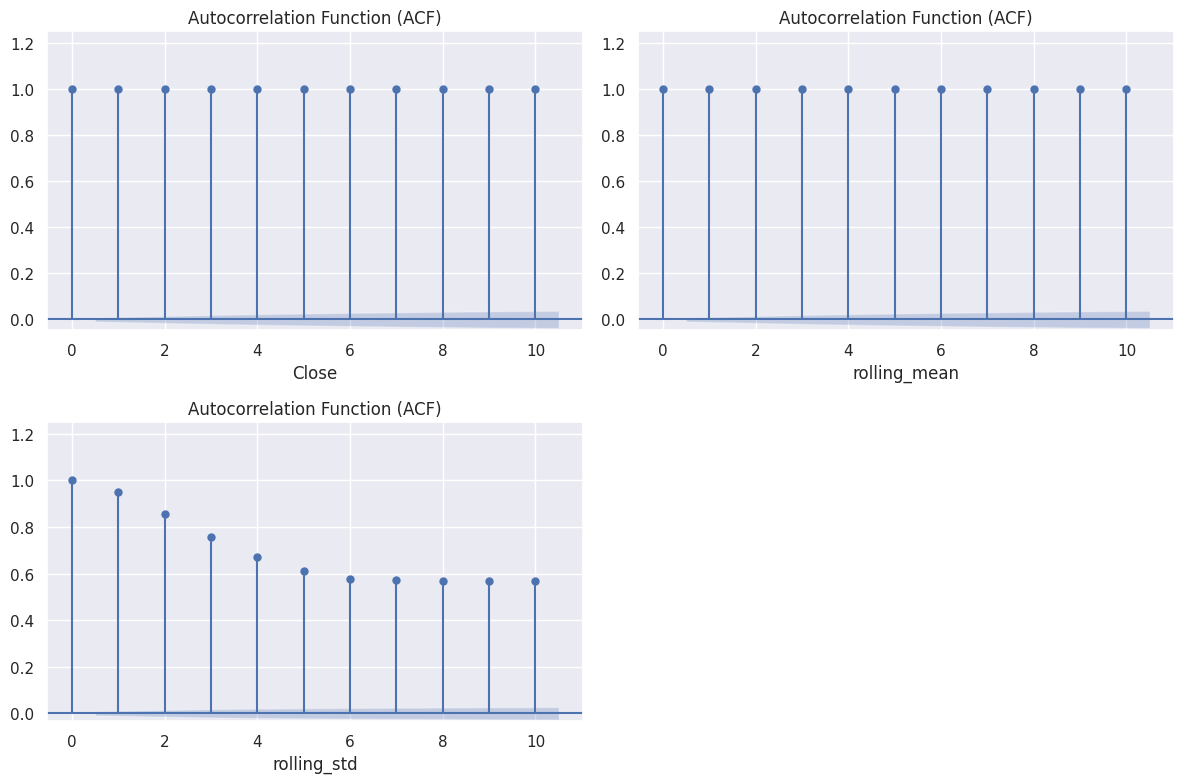

In [16]:
# Visualisasi dekomposisi data ACF
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_to_use):
    plt.subplot(2, 2, i + 1)
    plot_acf(df[feature], lags=10, ax=plt.gca(), auto_ylims=True)
    plt.title("Autocorrelation Function (ACF)")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

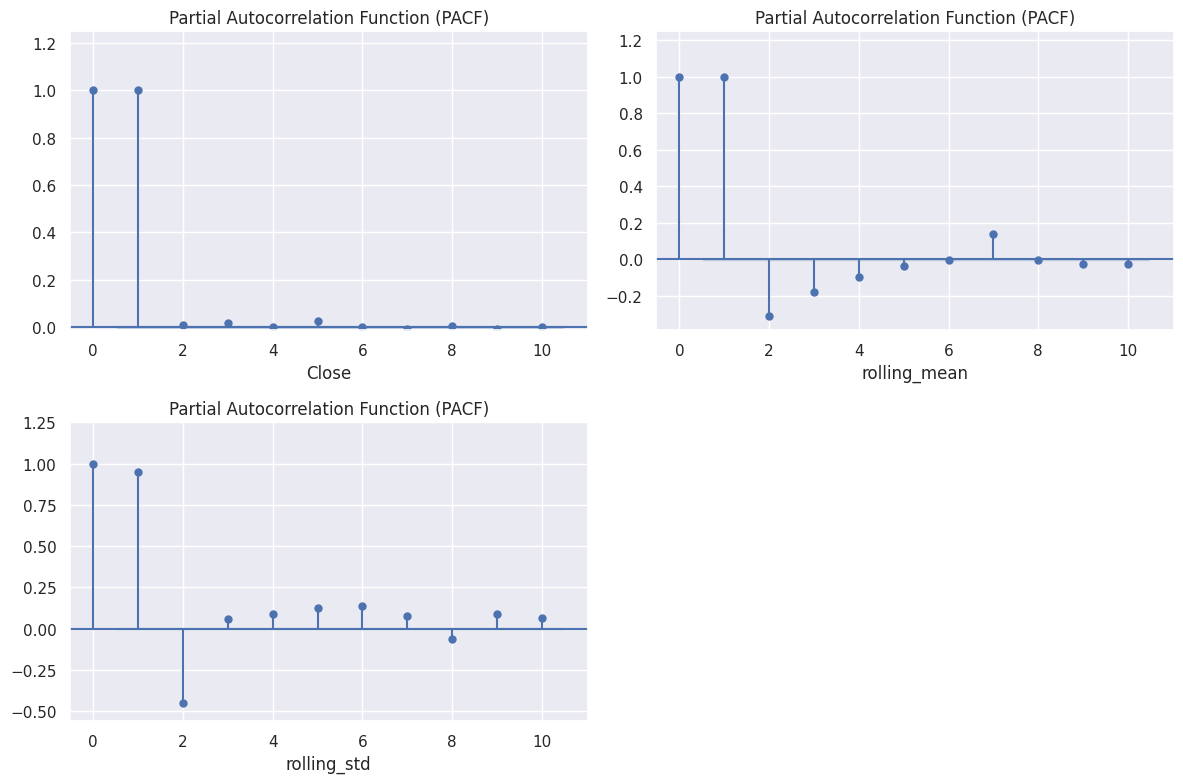

In [17]:
# Visualisasi dekomposisi data PACF
plt.figure(figsize=(12, 8))
for i, feature in enumerate(feature_to_use):
    plt.subplot(2, 2, i + 1)
    plot_pacf(df[feature], lags=10, ax=plt.gca(), auto_ylims=True)
    plt.title("Partial Autocorrelation Function (PACF)")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

### Membangun Arsitektur Model Kustom

In [18]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units=32, activation="relu"):
        super(MyDenseLayer, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
                             initial_value=w_init(shape=(input_shape[1], self.units), dtype="float32"),
                             trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
                             initial_value=b_init(shape=(self.units), dtype="float32"),
                             trainable=True)
    def call(self, inputs):
        return self.activation(tf.matmul(inputs, self.w) + self.b)

    def get_config(self):
        base_config = super().get_config()
        config = {
            "units": units,
            "activation": activation
        }
        return {**base_config, **config}        

In [19]:
class MyDropout(tf.keras.layers.Layer):
    """
        Rererensi:
        https://github.com/keras-team/keras/blob/v3.11.3/keras/src/layers/regularization/dropout.py#L6
    """
    
    def __init__(self, rate, noise_shape=None, seed=None, **kwargs):
        super().__init__(**kwargs)
        if not 0 <= rate <= 1:
            raise ValueError(
                f"Invalid value received for argument "
                "`rate`. Expected a float value between 0 and 1. "
                f"Received: rate={rate}"
            )
        self.rate = rate

    def call(self, inputs, training=False):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        else:
            return inputs

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        base_config = super().get_config()
        config = {
            "rate": self.rate,
        }
        return {**base_config, **config}

In [20]:
def _index_to_einsum_variable(i):
    return string.ascii_lowercase[i]

def _build_attention_equation(rank, attn_axes):
    target_notation = ""
    for i in range(rank):
        target_notation += _index_to_einsum_variable(i)
    batch_dims = tuple(np.delete(range(rank), attn_axes + (rank - 1,)))
    letter_offset = rank
    source_notation = ""
    for i in range(rank):
        if i in batch_dims or i == rank - 1:
            source_notation += target_notation[i]
        else:
            source_notation += _index_to_einsum_variable(letter_offset)
            letter_offset += 1
    product_notation = "".join(
        [target_notation[i] for i in batch_dims]
        + [target_notation[i] for i in attn_axes]
        + [source_notation[i] for i in attn_axes]
    )
    dot_product_equation = "%s,%s->%s" % (source_notation, target_notation, product_notation)
    attn_scores_rank = len(product_notation)
    combine_equation = "%s,%s->%s" % (product_notation, source_notation, target_notation)
    return dot_product_equation, combine_equation, attn_scores_rank

def _build_proj_equation(free_dims, bound_dims, output_dims):
    input_str, kernel_str, output_str, bias_axes = "", "", "", ""
    letter_offset = 0
    for i in range(free_dims):
        char = _index_to_einsum_variable(i + letter_offset)
        input_str += char
        output_str += char
    letter_offset += free_dims
    for i in range(bound_dims):
        char = _index_to_einsum_variable(i + letter_offset)
        input_str += char
        kernel_str += char
    letter_offset += bound_dims
    for i in range(output_dims):
        char = _index_to_einsum_variable(i + letter_offset)
        kernel_str += char
        output_str += char
        bias_axes += char
    equation = f"{input_str},{kernel_str}->{output_str}"
    return equation, bias_axes, len(output_str)

def _get_output_shape(output_rank, known_last_dims):
    return [None] * (output_rank - len(known_last_dims)) + list(known_last_dims)


class MyMultiHeadAttention(Layer):
    """
    Referensi:
    https://github.com/keras-team/keras/blob/v3.3.3/keras/src/layers/attention/multi_head_attention.py#L19-L636
    """
    def __init__(self, num_heads, key_dim, value_dim=None, dropout=0.0, output_shape=None, attention_axes=None, **kwargs):
        super().__init__(**kwargs)
        self.supports_masking = True
        self._num_heads = num_heads
        self._key_dim = key_dim
        self._value_dim = value_dim if value_dim is not None else key_dim
        self._attention_axes = attention_axes
        self._dropout = dropout
        self._output_shape = output_shape
        
    @property
    def num_heads(self):
        return self._num_heads

    @property
    def key_dim(self):
        return self._key_dim
    
    @property
    def dropout(self):
        return self._dropout

    def build(self, query_shape, value_shape, key_shape=None):
        if key_shape is None:
            key_shape = value_shape
        query_rank = len(query_shape)
        value_rank = len(value_shape)
        key_rank = len(key_shape)
        
        einsum_equation, _, output_rank = _build_proj_equation(query_rank - 1, bound_dims=1, output_dims=2)
        self._query_dense = EinsumDense(
            einsum_equation,
            output_shape=_get_output_shape(output_rank - 1, [self._num_heads, self._key_dim]),
            name="query"
        )
        self._query_dense.build(query_shape)

        einsum_equation, _, output_rank = _build_proj_equation(key_rank - 1, bound_dims=1, output_dims=2)
        self._key_dense = EinsumDense(
            einsum_equation,
            output_shape=_get_output_shape(output_rank - 1, [self._num_heads, self._key_dim]),
            name="key"
        )
        self._key_dense.build(key_shape)

        einsum_equation, _, output_rank = _build_proj_equation(value_rank - 1, bound_dims=1, output_dims=2)
        self._value_dense = EinsumDense(
            einsum_equation,
            output_shape=_get_output_shape(output_rank - 1, [self._num_heads, self._value_dim]),
            name="value"
        )
        self._value_dense.build(value_shape)

        self._build_attention(output_rank)
        
        self._output_dense = self._make_output_dense(query_shape, "attention_output")
        output_dense_input_shape = list(self._query_dense.compute_output_shape(query_shape))
        output_dense_input_shape[-1] = self._value_dim
        self._output_dense.build(tuple(output_dense_input_shape))
        
        self.built = True

    def _make_output_dense(self, query_shape, name):
        query_rank = len(query_shape)
        # Sekarang self._output_shape dijamin ada
        if self._output_shape:
            if not isinstance(self._output_shape, collections.abc.Sized):
                output_shape = [self._output_shape]
            else:
                output_shape = self._output_shape
        else:
            output_shape = [query_shape[-1]]
        
        einsum_equation, _, output_rank = _build_proj_equation(query_rank - 1, bound_dims=2, output_dims=len(output_shape))
        return EinsumDense(
            einsum_equation,
            output_shape=_get_output_shape(output_rank - 1, output_shape),
            name=name
        )

    def _build_attention(self, rank):
        if self._attention_axes is None:
            self._attention_axes = tuple(range(1, rank - 2))
        else:
            self._attention_axes = tuple(self._attention_axes)
        
        (
            self._dot_product_equation,
            self._combine_equation,
            attn_scores_rank,
        ) = _build_attention_equation(rank, attn_axes=self._attention_axes)
        
        norm_axes = tuple(range(attn_scores_rank - len(self._attention_axes), attn_scores_rank))
        self._softmax = Softmax(axis=norm_axes)
        self._dropout_layer = Dropout(rate=self._dropout)
        self._inverse_sqrt_key_dim = 1.0 / math.sqrt(float(self._key_dim))

    def _masked_softmax(self, attention_scores, attention_mask=None):
        if attention_mask is not None:
            mask_expansion_axis = -len(self._attention_axes) * 2 - 1
            for _ in range(len(attention_scores.shape) - len(attention_mask.shape)):
                attention_mask = ops.expand_dims(attention_mask, axis=mask_expansion_axis)
        return self._softmax(attention_scores, mask=attention_mask)

    def _compute_attention(self, query, key, value, attention_mask=None, training=None):
        query = ops.multiply(query, ops.cast(self._inverse_sqrt_key_dim, query.dtype))
        attention_scores = ops.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask)

        if self.dropout > 0.0:
            final_attn_scores = self._dropout_layer(attention_scores, training=training)
        else:
            final_attn_scores = attention_scores

        attention_output = ops.einsum(self._combine_equation, final_attn_scores, value)
        return attention_output, attention_scores

    def call(self, query, value, key=None, return_attention_scores=False, training=None, use_causal_mask=False):
        if key is None:
            key = value
            
        attention_mask = self._compute_attention_mask(query, value, use_causal_mask=use_causal_mask)

        query = self._query_dense(query)
        key = self._key_dense(key)
        value = self._value_dense(value)

        attention_output, attention_scores = self._compute_attention(query, key, value, attention_mask, training)
        attention_output = self._output_dense(attention_output)

        if return_attention_scores:
            return attention_output, attention_scores
        return attention_output

    def _compute_attention_mask(self, query, value, use_causal_mask=False):
        if use_causal_mask:
            return self._compute_causal_mask(query, value)
        return None

    def _compute_causal_mask(self, query, value):
        q_seq_length = ops.shape(query)[1]
        v_seq_length = ops.shape(value)[1]
        ones_mask = ops.ones((1, q_seq_length, v_seq_length), dtype="int32")
        row_index = ops.cumsum(ones_mask, axis=-2)
        col_index = ops.cumsum(ones_mask, axis=-1)
        return ops.greater_equal(row_index, col_index)

    def compute_output_shape(self, query_shape, value_shape, key_shape=None):
        if key_shape is None:
            key_shape = value_shape

        if query_shape[-1] != value_shape[-1]:
            raise ValueError(
                "The last dimension of `query_shape` and `value_shape` "
                f"must be equal, but are {query_shape[-1]}, {value_shape[-1]}. "
                "Received: query_shape={query_shape}, value_shape={value_shape}"
            )

        if value_shape[1:-1] != key_shape[1:-1]:
            raise ValueError(
                "All dimensions of `value` and `key`, except the last one, "
                f"must be equal. Received: value_shape={value_shape} and "
                f"key_shape={key_shape}"
            )

        if self._output_shape:
            return query_shape[:-1] + self._output_shape

        return query_shape

    def get_config(self):
        base_config = super().get_config()
        config = {
            "num_heads": self._num_heads,
            "key_dim": self._key_dim,
            "value_dim": self._value_dim,
            "dropout": self._dropout,
            "output_shape": self._output_shape,
            "attention_axes": self._attention_axes,
        }
        return {**base_config, **config}

In [21]:
NUM_FEATURES = 3

# Membangun model LSTM dasar sebagai baseline
model_lstm_baseline = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(WINDOW_SIZE, NUM_FEATURES), return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(HORIZON)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model_lstm_baseline.compile(
    loss="mae",
    metrics=["mae"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
)
 
history_lstm_baseline = model_lstm_baseline.fit(
    train_ds_multi,
    epochs=12,
    validation_data=val_ds_multi
)

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, None, 3))', 'Tensor(shape=(None, None, 1))')
  warnings.warn(msg)
I0000 00:00:1760609622.966715      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1319/Unknown 39s 27ms/step - loss: 0.0146 - mae: 0.0146

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1319/1319 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 0.0146 - mae: 0.0146 - val_loss: 0.0476 - val_mae: 0.0476
Epoch 2/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - loss: 0.0559 - mae: 0.0559 - val_loss: 0.0358 - val_mae: 0.0358
Epoch 3/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - loss: 0.0519 - mae: 0.0519 - val_loss: 0.0371 - val_mae: 0.0371
Epoch 4/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - loss: 0.0519 - mae: 0.0519 - val_loss: 0.0368 - val_mae: 0.0368
Epoch 5/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0519 - mae: 0.0519 - val_loss: 0.0363 - val_mae: 0.0363
Epoch 6/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0509 - mae: 0.0509 - val_loss: 0.0352 - val_mae: 0.0352
Epoch 7/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - loss: 0.0514 - mae: 0.0514 - val_loss: 0.0332 - val_mae: 0.0332
Epoch 8/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - loss: 0.0502 - mae: 0.0502 - val_loss: 0.0312 - val_mae: 0.0312
Epoch 9/12
1319/1319 ━━━━━━━━━━━━━━

In [23]:
min_price_feature = scaler.data_min_[0]
max_price_feature = scaler.data_max_[0]
print(f"Min value : {min_price_feature}, Max value : {max_price_feature}")

Min value : 3172.05, Max value : 68633.69


In [24]:
# Denormalisasi data
predicted_price_scaled = model_lstm_baseline.predict(test_ds_multi)
predicted_price_ori = predicted_price_scaled * (max_price_feature - min_price_feature) + min_price_feature
# Data terakhir tidak diambil karena pada saat pelatihan data pertama tidak terambil dikarenakan window size + horizon
predicted_price = predicted_price_ori[:-1]
predicted_price

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 300, 3))', 'Tensor(shape=(32, 24, 1))')
  warnings.warn(msg)


156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


array([[24831.459, 25019.62 , 24976.568, ..., 24794.334, 24809.383,
        24792.365],
       [24829.146, 25016.842, 24975.982, ..., 24792.64 , 24807.533,
        24791.2  ],
       [24786.832, 24979.74 , 24932.361, ..., 24751.877, 24765.8  ,
        24748.72 ],
       ...,
       [24749.336, 24943.828, 24902.994, ..., 24716.469, 24733.604,
        24714.86 ],
       [24745.426, 24939.63 , 24899.885, ..., 24712.922, 24730.021,
        24711.443],
       [24726.074, 24922.414, 24880.389, ..., 24694.248, 24711.23 ,
        24692.191]], dtype=float32)

In [25]:
predicted_price.shape

(4991, 24)

In [26]:
# Ambil data target price
predicted_price = predicted_price[:, 0]
predicted_price.shape

(4991,)

In [27]:
actual_price = test_data[WINDOW_SIZE+HORIZON:]["Close"].to_numpy()
actual_price

array([27531.28, 27593.34, 27589.64, ..., 28604.09, 28649.65, 28713.71])

In [28]:
# Inference menggunakan model baseline LSTM
pd.DataFrame({
    "Data Aktual": actual_price,
    "Hasil Prediksi": predicted_price,
    "Selisih": actual_price - predicted_price
})

,Data Aktual,Hasil Prediksi,Selisih
0,27531.28,24831.458984,2699.821016
1,27593.34,24829.146484,2764.193516
2,27589.64,24786.832031,2802.807969
3,27529.26,24693.279297,2835.980703
4,27516.61,24674.796875,2841.813125
...,...,...,...
4986,28750.75,24773.517578,3977.232422
4987,28715.38,24761.974609,3953.405391
4988,28604.09,24749.335938,3854.754063
4989,28649.65,24745.425781,3904.224219


In [29]:
model_lstm_baseline.save("model_baseline_LSTM.keras")

In [30]:
# Seq2Seq LSTM dengan pendekatan Teacher Forcing menggunakan model subclassing
class MySeq2SeqAttention(tf.keras.Model):
    def __init__(self, lstm_units, num_heads, dropout_rate=0.0, name="seq2seq_attention", **kwargs):
        super().__init__(name=name, **kwargs)
        self.lstm_units = lstm_units
        self.num_heads = num_heads
        self.dropout_rate = dropout_rate
        
        self.encoder_lstm = tf.keras.layers.LSTM(
            self.lstm_units, 
            return_sequences=True, 
            return_state=True, 
            name="encoder_lstm"
        )
        
        self.decoder_lstm = tf.keras.layers.LSTM(
            self.lstm_units, 
            return_sequences=True, 
            return_state=True, 
            name="decoder_lstm"
        )
        self.decoder_dropout = MyDropout(dropout_rate, name="decoder_dropout")
        self.attention_layer = MyMultiHeadAttention(
            num_heads=self.num_heads, 
            key_dim=self.lstm_units, 
            name="multi_head_attention"
        )
        
        self.vector_dropout = MyDropout(self.dropout_rate, name="vector_dropout")
        self.concat_layer = tf.keras.layers.Concatenate(axis=-1, name="concatenate_layer")
        self.output_layer = tf.keras.layers.TimeDistributed(
            tf.keras.layers.Dense(1), name="output_layer"
        )

    def call(self, inputs, training=False):
        encoder_input, decoder_input = inputs
        
        encoder_outputs, state_h, state_c = self.encoder_lstm(encoder_input, training=training)
        encoder_states = [state_h, state_c]
        
        decoder_outputs, state_h_dec, state_c_dec = self.decoder_lstm(decoder_input, initial_state=encoder_states, training=training)
        decoder_dropout_output = self.decoder_dropout(decoder_outputs, training=training)
        
        context_vector = self.attention_layer(
            query=decoder_dropout_output, 
            value=encoder_outputs, 
            key=encoder_outputs,
            training=training
        )
        
        vector_dropout_output = self.vector_dropout(context_vector, training=training)
        decoder_combined_output = self.concat_layer([decoder_dropout_output, vector_dropout_output])
        output = self.output_layer(decoder_combined_output, training=training)
        
        return output

    def get_config(self):
        base_config = super().get_config()
        config = {
            "lstm_units": self.lstm_units,
            "num_heads": self.num_heads,
            "dropout_rate": self.dropout_rate,
        }
        return {**base_config, **config}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [31]:
LSTM_UNITS = 64
NUM_HEADS = 4
DROPOUT_RATE = 0.4

model_attention_subclassed = MySeq2SeqAttention(
    lstm_units=LSTM_UNITS,
    num_heads=NUM_HEADS,
    dropout_rate=DROPOUT_RATE
)

dummy_encoder_input = tf.random.uniform(shape=(1, WINDOW_SIZE, 3))
dummy_decoder_input = tf.random.uniform(shape=(1, HORIZON, 1))

_ = model_attention_subclassed([dummy_encoder_input, dummy_decoder_input])
model_attention_subclassed.summary()

Model: "seq2seq_attention"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_lstm (LSTM)             │ ((1, 300, 64), (1,     │        17,408 │
│                                 │ 64), (1, 64))          │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_lstm (LSTM)             │ ((1, 24, 64), (1, 64), │        16,896 │
│                                 │ (1, 64))               │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dropout (MyDropout)     │ (1, 24, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention            │ (1, 24, 64)            │        65,536 │
│ (MyMultiHeadAttention)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vector_dropout (MyDropout)      │ (1, 24, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_layer (Concatenate) │ (1, 24, 128)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (TimeDistributed)  │ (1, 24, 1)             │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,969 (390.50 KB)

 Trainable params: 99,969 (390.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
class MyMAE(tf.keras.losses.Loss):
  def __init__(self, weights):
    super().__init__()
    self.weights = tf.constant(weights, dtype=tf.float32)
    
  def call(self, y_true, y_pred):
    mae_error = tf.math.abs(y_true - y_pred)
    weighted_mae_differece = mae_error * self.weights
      
    return tf.reduce_mean(weighted_mae_differece, axis=-1)

In [33]:
class MyEarlyStopping(tf.keras.callbacks.Callback):
    """
        Referensi:
        https://github.com/keras-team/keras/blob/v3.3.3/keras/src/callbacks/early_stopping.py#L10-L213
    """
    
    def __init__(self, monitor='val_loss', patience=3, mode='min', restore_best_weights=True):
        super(MyEarlyStopping, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.restore_best_weights = restore_best_weights

        if mode == 'auto':
            if 'acc' in self.monitor:
                self.mode = 'max'
            else:
                self.mode = 'min'
        else:
            self.mode = mode

        if self.mode == 'min':
            self.monitor_op = np.less
            self.best_value = np.Inf
        elif self.mode == 'max':
            self.monitor_op = np.greater
            self.best_value = -np.Inf
        else:
            raise ValueError(f"Mode '{self.mode}' tidak dikenali. Gunakan 'min', 'max', atau 'auto'.")

    def on_train_begin(self, logs=None):
        self.wait_count = 0
        self.stopped_epoch = 0
        self.best_weights = None
        self.best_value = np.Inf if self.mode == 'min' else -np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current_value = logs.get('val_loss') if logs else None

        if current_value is None:
            warnings.warn(f"Metrik Early Stopping '{self.monitor}' tidak tersedia. Training akan dilanjutkan.", RuntimeWarning)
            return

        if self.monitor_op(current_value, self.best_value):
            self.best_value = current_value
            self.wait_count = 0
            if self.restore_best_weights:
                self.best_weights = self.model.get_weights()
        else:
            self.wait_count += 1

        if self.wait_count >= self.patience:
            self.stopped_epoch = epoch
            self.model.stop_training = True
            print(f"\nEpoch {epoch + 1}: Early stopping karena '{self.monitor}' tidak membaik selama {self.patience} epoch.")

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0 and self.restore_best_weights:
            print(f"Mengembalikan bobot model dari akhir epoch terbaik: {self.stopped_epoch - self.patience + 1}")
            self.model.set_weights(self.best_weights)

In [34]:
class MyLearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, optimizer, decay_factor=0.5, patience=1):
        super(MyLearningRateScheduler, self).__init__()
        self.optimizer = optimizer
        self.decay_factor = decay_factor
        self.patience = patience
        self.best_val_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_val_loss = logs.get('val_loss') if logs else None
        
        if current_val_loss is None:
            return

        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.wait = 0
            print(f"Epoch {epoch + 1}: val_loss membaik ke {current_val_loss:.4f}")
        else:
            self.wait += 1
            print(f"Epoch {epoch + 1}: val_loss tidak membaik ({self.wait}/{self.patience})")

        if self.wait >= self.patience:
            old_lr = self.optimizer.learning_rate.numpy()
            new_lr = max(old_lr * self.decay_factor, 1e-6) # batas bawah biar gak 0
            self.optimizer.learning_rate.assign(new_lr)
            self.wait = 0
            print(f"Learning rate diturunkan dari {old_lr:.6f} ke {new_lr:.6f}")


### Membuat Pelatihan Kustom

In [35]:
weights_list = []

for i in range(1, HORIZON):
    if len(weights_list) == 0:
        weights_list.append(i)
    else:
        weights_list.append(np.round(weights_list[-1] + 0.2, 2))

print(weights_list)

[1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4]


In [36]:
class MyTrainer: 
    def __init__(self, model, loss_fn, optimizer, callbacks=[], checkpoint_dir="./checkpoints"):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.callbacks = callbacks
        self.best_val_loss = float('inf')
        
        self.train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
        self.val_loss_metric = tf.keras.metrics.Mean(name='val_loss')

        self.checkpoint = tf.train.Checkpoint(optimizer=self.optimizer, model=self.model)
        self.checkpoint_manager = tf.train.CheckpointManager(self.checkpoint, checkpoint_dir, max_to_keep=3)

    @tf.function
    def train_step(self, x_batch, y_batch):
        encoder_input, decoder_input = x_batch
        
        with tf.GradientTape() as tape:
            predictions = self.model((encoder_input, decoder_input), training=True)
            loss = self.loss_fn(y_batch, predictions)
        
        gradients = tape.gradient(loss, self.model.trainable_variables)
        clipped_grads = [tf.clip_by_value(g, -1.0, 1.0) for g in gradients]
        self.optimizer.apply_gradients(zip(clipped_grads, self.model.trainable_variables))
        
        self.train_loss_metric.update_state(loss)

    @tf.function
    def val_step(self, x_batch, y_batch):
        encoder_input, decoder_input = x_batch
        
        predictions = self.model((encoder_input, decoder_input), training=False)
        loss = self.loss_fn(y_batch, predictions)
        
        self.val_loss_metric.update_state(loss)

    def evaluate(self, test_dataset):
        self.val_loss_metric.reset_state()
        
        for x_batch, y_batch in test_dataset:
            self.val_step(x_batch, y_batch)
            
        test_loss = self.val_loss_metric.result()
        return {'loss': test_loss.numpy()}

    def fit(self, train_dataset, val_dataset, epochs=10):
        print("Memulai training untuk model Seq2Seq...")

        for cb in self.callbacks:
            cb.set_model(self.model)
            
        for epoch in range(epochs):
            start_time = time.time()
            
            self.train_loss_metric.reset_state()
            self.val_loss_metric.reset_state()
            
            for x_batch, y_batch in train_dataset:
                self.train_step(x_batch, y_batch)
            
            for x_batch, y_batch in val_dataset:
                self.val_step(x_batch, y_batch)
                
            duration = time.time() - start_time
            train_loss = self.train_loss_metric.result()
            val_loss = self.val_loss_metric.result()

            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                ckpt_path = self.checkpoint_manager.save()
                print(f"Checkpoint disimpan karena val_loss membaik: {val_loss:.4f} -> {self.best_val_loss:.4f}")

            # Looping karena bentuk callback list
            for cb in self.callbacks:
                cb.on_epoch_end(epoch, logs={'val_loss': float(val_loss)})

            if hasattr(self.model, "stop_training") and self.model.stop_training:
                print(f"\nTraining dihentikan di epoch {epoch + 1} karena EarlyStopping.")
                break

            print(
                f"Epoch {epoch + 1}/{epochs} - {duration:.2f}s - "
                f"loss: {train_loss:.4f} - val_loss: {val_loss:.4f}"
            )
        print("Training selesai.")

    def restore_best_checkpoint(self):
        if self.checkpoint_manager.latest_checkpoint:
            self.checkpoint.restore(self.checkpoint_manager.latest_checkpoint)
            print(f"Model terbaik dimuat dari: {self.checkpoint_manager.latest_checkpoint}")
        else:
            print("Tidak ada checkpoint ditemukan.")

    def save_best_model(self, path="best_model_seq2seq_LSTM.keras"):
        self.model.save(path)
        print(f"Model terbaik disimpan ke: {path}")

In [37]:
my_mae = MyMAE(weights_list)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
my_learningrate_scheduler = MyLearningRateScheduler(optimizer=optimizer, patience=1, decay_factor=0.5)
my_early_stopping = MyEarlyStopping(monitor='val_loss', patience=3, mode='min')

trainer = MyTrainer(
    model=model_attention_subclassed,
    loss_fn=my_mae,
    optimizer=optimizer,
    callbacks=[my_early_stopping, my_learningrate_scheduler]
)

trainer.fit(
    train_dataset=train_ds_multi,
    val_dataset=val_ds_multi,
    epochs=100
)

Memulai training untuk model Seq2Seq...
Checkpoint disimpan karena val_loss membaik: 0.1166 -> 0.1166
Epoch 1: val_loss membaik ke 0.1166
Epoch 1/100 - 30.66s - loss: 0.0663 - val_loss: 0.1166
Checkpoint disimpan karena val_loss membaik: 0.0825 -> 0.0825
Epoch 2: val_loss membaik ke 0.0825
Epoch 2/100 - 23.02s - loss: 0.0771 - val_loss: 0.0825
Checkpoint disimpan karena val_loss membaik: 0.0804 -> 0.0804
Epoch 3: val_loss membaik ke 0.0804
Epoch 3/100 - 23.26s - loss: 0.0881 - val_loss: 0.0804
Checkpoint disimpan karena val_loss membaik: 0.0794 -> 0.0794
Epoch 4: val_loss membaik ke 0.0794
Epoch 4/100 - 23.32s - loss: 0.0867 - val_loss: 0.0794
Checkpoint disimpan karena val_loss membaik: 0.0762 -> 0.0762
Epoch 5: val_loss membaik ke 0.0762
Epoch 5/100 - 23.27s - loss: 0.0783 - val_loss: 0.0762
Checkpoint disimpan karena val_loss membaik: 0.0717 -> 0.0717
Epoch 6: val_loss membaik ke 0.0717
Epoch 6/100 - 23.69s - loss: 0.0738 - val_loss: 0.0717
Epoch 7: val_loss tidak membaik (1/1)
Lear

In [38]:
model_attention_subclassed.save("model_seq2seq_LSTM.keras")

In [39]:
trainer.restore_best_checkpoint()
trainer.save_best_model(path="best_model_seq2seq_LSTM.keras")

Model terbaik dimuat dari: ./checkpoints/ckpt-30
Model terbaik disimpan ke: best_model_seq2seq_LSTM.keras


In [40]:
loss = trainer.evaluate(test_ds_multi)
print(f"loss: {loss['loss']}")

loss: 0.011647434905171394


In [41]:
dummy_encoder_input.shape

TensorShape([1, 300, 3])

In [42]:
tf.keras.layers.Input(
    shape=(None, dummy_encoder_input.shape[-1])
)

<KerasTensor shape=(None, None, 3), dtype=float32, sparse=False, name=keras_tensor_5>

In [43]:
# Dapatkan jumlah unit LSTM dan jumlah fitur dari model yang ada
lstm_units = model_attention_subclassed.get_layer('encoder_lstm').units

# Encoder
encoder_input = tf.keras.layers.Input(
    shape=(None, dummy_encoder_input.shape[-1])
)
 
# Ambil layer encoder dan outputnya
encoder_lstm_layer = model_attention_subclassed.get_layer('encoder_lstm')
encoder_outputs, state_h, state_c = encoder_lstm_layer(encoder_input)
encoder_states = [state_h, state_c]
 
encoder_model = tf.keras.models.Model(
    inputs=encoder_input,
    outputs=[encoder_outputs] + encoder_states
)

In [44]:
# Decoder
# Definisikan semua input yang dibutuhkan untuk satu langkah prediksi
decoder_input_single = tf.keras.layers.Input(shape=(1, 1), name='decoder_input_single')
decoder_state_input_h = tf.keras.layers.Input(shape=(lstm_units,), name='decoder_state_h_input')
decoder_state_input_c = tf.keras.layers.Input(shape=(lstm_units,), name='decoder_state_c_input')
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
encoder_outputs_input = tf.keras.layers.Input(shape=(WINDOW_SIZE, lstm_units), name='encoder_outputs_input')
 
# Ambil semua layer yang sudah terlatih langsung dari model asli
# Kita tidak perlu membuat layer baru karena sudah dikonfigurasi dengan benar
decoder_lstm = model_attention_subclassed.get_layer('decoder_lstm')
attention_layer = model_attention_subclassed.get_layer('multi_head_attention')
concat_layer = model_attention_subclassed.get_layer('concatenate_layer')
output_layer = model_attention_subclassed.get_layer('output_layer')
decoder_dropout_layer = model_attention_subclassed.get_layer('decoder_dropout')
vector_dropout_layer = model_attention_subclassed.get_layer('vector_dropout')
 
 
# Rangkai ulang arsitektur untuk satu langkah prediksi
decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
    decoder_input_single, initial_state=decoder_states_inputs
)
decoder_states_output = [state_h_dec, state_c_dec]
d_outputs_reg = decoder_dropout_layer(decoder_outputs, training=False)
 
# Hitung context vector
context_vector = attention_layer(query=d_outputs_reg, value=encoder_outputs_input, key=encoder_outputs_input)
c_vector_reg = vector_dropout_layer(context_vector, training=False)
 
combined_output = concat_layer([d_outputs_reg, c_vector_reg])
prediction = output_layer(combined_output)
prediction

<KerasTensor shape=(None, 1, 1), dtype=float32, sparse=False, name=keras_tensor_17>

In [45]:
decoder_model = tf.keras.models.Model(
    inputs=[decoder_input_single, decoder_states_inputs, encoder_outputs_input],
    outputs=[prediction] + decoder_states_output
)

In [46]:
def predict_sequence_attention(input_seq, encoder_model, decoder_model, horizon):
    # 1. Dapatkan output dan state awal dari encoder
    encoder_outputs, state_h, state_c = encoder_model.predict(input_seq)
    states_value = [state_h, state_c]
 
    # 2. Ambil nilai terakhir dari FITUR TARGET (kolom ke-0) sebagai token awal
    last_value = input_seq[0, -1, 0]
    target_seq = np.array([[[last_value]]]) # Shape: (1, 1, 1)
 
    # 3. List untuk menyimpan hasil prediksi
    output_sequence = []
 
    # 4. Loop autoregressive
    for _ in range(horizon):
        # Prediksi satu langkah ke depan, berikan semua konteks yang dibutuhkan
        output_token, h, c = decoder_model.predict(
            [target_seq, states_value, encoder_outputs],
            verbose=0
        )
        output_sequence.append(output_token[0, 0, 0])
        target_seq = output_token
        states_value = [h, c]
 
    return np.array(output_sequence)

In [47]:
num_features = dummy_encoder_input.shape[-1]

# Ambil satu batch dari data uji untuk demonstrasi
for (encoder_in, decoder_in), decoder_target in test_ds_multi.take(11):
    sample_encoder_input = encoder_in[0:1] # Ambil 1 sampel, shape: (1, 300, 3)
    sample_decoder_target = decoder_target[0] # Target sebenarnya, shape: (5, 1)
 
# Lakukan prediksi
predicted_sequence_scaled = predict_sequence_attention(
    sample_encoder_input, encoder_model, decoder_model, HORIZON
)
 
# Buat array dummy dengan jumlah fitur, isi kolom target dengan hasil prediksi
# Untuk prediksi
dummy_array_pred = np.zeros((len(predicted_sequence_scaled), num_features))
dummy_array_pred[:, 0] = predicted_sequence_scaled
predicted_price = scaler.inverse_transform(dummy_array_pred)[:, 0]
 
# Untuk data aktual
dummy_array_actual = np.zeros((len(sample_decoder_target), num_features))
dummy_array_actual[:, 0] = sample_decoder_target.numpy().flatten()
actual_price = scaler.inverse_transform(dummy_array_actual)[:, 0]

pd.DataFrame({
    "Jam Ke": df.index.hour[:HORIZON],
    "Data Aktual": actual_price.flatten(),
    "Hasil Prediksi": predicted_price.flatten(),
    "Selisih": actual_price.flatten() - predicted_price.flatten()
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


,Jam Ke,Data Aktual,Hasil Prediksi,Selisih
0,9,27816.76,27672.611596,144.148404
1,10,27869.48,27562.264286,307.215714
2,11,27933.36,27481.391309,451.968691
3,12,27840.90,27375.932977,464.967023
4,13,27892.63,27272.669418,619.960582
5,14,27896.93,27185.097020,711.832980
6,15,27914.64,27120.389273,794.250727
7,16,27944.10,27081.140888,862.959112
8,17,27879.30,27066.583206,812.716794
9,18,27911.51,27073.563558,837.946442


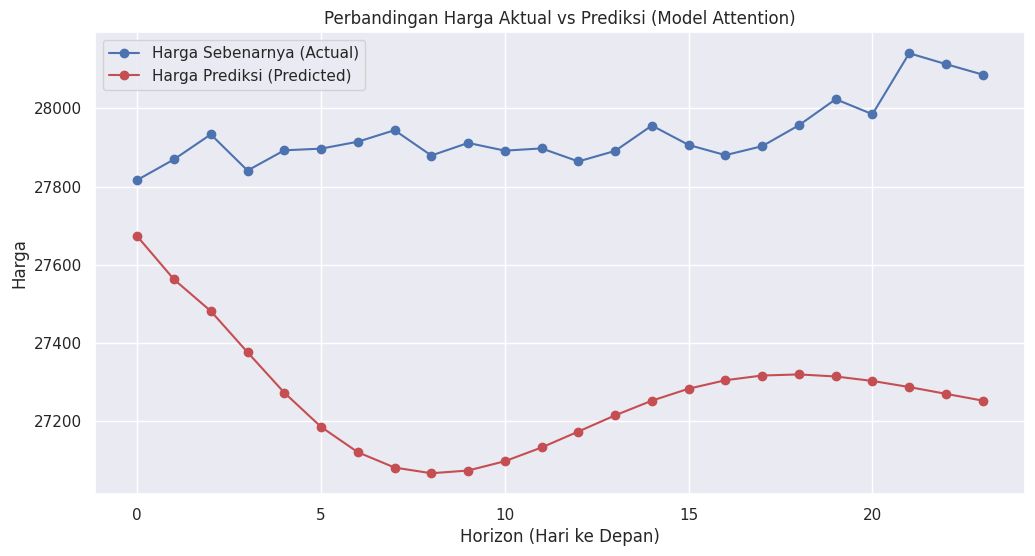

In [48]:
# Visualisasi Hasil
plt.figure(figsize=(12, 6))
plt.plot(actual_price, 'bo-', label='Harga Sebenarnya (Actual)')
plt.plot(predicted_price, 'ro-', label='Harga Prediksi (Predicted)')
plt.title('Perbandingan Harga Aktual vs Prediksi (Model Attention)')
plt.ylabel('Harga')
plt.xlabel('Horizon (Hari ke Depan)')
plt.legend()
plt.grid(True)
plt.show()